# Team-1-ExcelR-P57

# Topic Modelling

## Business objective
Social event tracking and evolution framework to obtain the evolutionary trends of social events and generate effective event summary details over time. The input is the  textual data collected from various social media. Based on the input data, our algorithm can learn multi-modality topics and track multiple events. After tracking, for each event, it can be visualized with texts and image over time. 

## Data Set Details:
Extraction of the textual data from various web sources like "Twitter"

In [52]:
# Importing important libraries
import tweepy
import pandas as pd
import re
import emoji
import nltk
import re

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# set variables for keys and tokens to access the Twitter API
mykeys = open('D:\\jupyter notebook workspace\\PROJECTS\\Topic Modeling\\tweetfile.txt', 'r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

auth = tweepy.OAuthHandler(consumer_key=api_key,
                           consumer_secret=api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
#Featching the data from twitter
search_words="news"
date_since='2021-07-18'
data_until='2021-07-22'
tweets = tweepy.Cursor(api.search,q=search_words,lang="en",tweet_mode='extended',
                       since=date_since,until=data_until,result_type="recent").items(300)

# Iterate and print tweets
lst=[]
for tweet in tweets:
    lst.append(tweet.full_text)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
print(lst)

['Ummmm... hello... \u2066@JohnKerry\u2069 .    https://t.co/KlzcyGNIS8', 'The new episode of "What\'s on Tap?" is now available at the links below. Tune in for Don and Alex\'s weekly run-down of the latest blockchain ecosystem news.\nhttps://t.co/c3kKPuLJ5U\nhttps://t.co/R9ulOkfjco', 'RT @killjoys_never: this article has the word  "school b4llying dispute" in the title and that Hyunjin returned from hiatus, are you sure i…', 'RT @briantylercohen: “Dr. Cobia said Monday that all but one of her COVID patients in Alabama did not receive the vaccine. The vaccinated p…', 'RT @jason_a_w: NEW: An Alaska Assistant Attorney General - who has worked civil rights cases - has advocated far right positions and the mi…', 'RT @ElieNYC: This is a quality headline \n\nhttps://t.co/KzQ8MAUEOi', 'RT @RelyonHorror: Capcom Announces New Line of Resident Evil Perfumes, Booze, CDs https://t.co/BPLtMThxrY', 'RT @cnnbrk: President Biden is holding a CNN town hall in Cincinnati, Ohio, just over six months afte

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
import pandas as pd
df=pd.DataFrame({'tweet':lst})
pd.set_option("display.max_colwidth", None)
df

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet
0,Ummmm... hello... ⁦@JohnKerry⁩ . https://t.co/KlzcyGNIS8
1,"The new episode of ""What's on Tap?"" is now available at the links below. Tune in for Don and Alex's weekly run-down of the latest blockchain ecosystem news.\nhttps://t.co/c3kKPuLJ5U\nhttps://t.co/R9ulOkfjco"
2,"RT @killjoys_never: this article has the word ""school b4llying dispute"" in the title and that Hyunjin returned from hiatus, are you sure i…"
3,RT @briantylercohen: “Dr. Cobia said Monday that all but one of her COVID patients in Alabama did not receive the vaccine. The vaccinated p…
4,RT @jason_a_w: NEW: An Alaska Assistant Attorney General - who has worked civil rights cases - has advocated far right positions and the mi…
...,...
295,RT @FirstCutTMO: What did the First Cut crew think of #SpaceJam2?! 🤔\n\nTune in to tonight’s episode of #FirstCutLIVE for their review and di…
296,"RT @accuweather: The smoke spread up to 2,500 miles downwind of the locations of the wildfires, and could even be seen via satellite: https…"
297,RT @bykristinep: Attorney General Merrick Garland Wednesday issued a long-anticipated directive restricting Justice Department contact with…
298,RT @3mmmod: I would urge all of my Iranian friends to tweet more in English.\nThis is a clear example of speareding false news about what is…


In [57]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


228

In [58]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


185

In [59]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,counts
172,"RT @_franandrea: DON'T react to this article, they are actually mentioning the scandal in the title, the people who reacted pls delete it!…",9
145,RT @RollingStone: Eric Clapton said he would cancel any shows if the venue requires attendees prove they are vaccinated against Covid-19. h…,7
228,RT @simonwiesenthal: SWC Condemns #Antisemitic Remarks by Director of Opening Ceremony of Tokyo #Olympics2021 https://t.co/eLtW8II9kY,5
106,"RT @JoyceWhiteVance: Alabama doctor says this about her Covid patients, some of whom are dying: “One of the last things they do before they…",5
164,RT @Variety: ‘Black Panther’ Sequel Casts Michaela Coel (EXCLUSIVE) https://t.co/eLe67YX8Nr,3
183,"RT @cnnbrk: President Biden is holding a CNN town hall in Cincinnati, Ohio, just over six months after taking office. Follow live updates h…",3
137,"RT @Portergauge: Man, this is.... really fucking bad, jesus christ. Some of the allegations in this are horrendous. https://t.co/os6DISsmQx",2
130,"RT @Pastor__West: Something very good is coming your way. Good news, good times, good relationships, good health and many blessings!",2
90,RT @ElieNYC: This is a quality headline \n\nhttps://t.co/KzQ8MAUEOi,2
110,RT @KamVTV: Eric Clapton said he would cancel any shows if the venue requires attendees prove they are vaccinated against Covid-19. https:/…,2


In [60]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-61-3e4f830a6a08>:3: DeprecationWarning: invalid escape sequence \s
  return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
<ipython-input-61-3e4f830a6a08>:7: DeprecationWarning: invalid escape sequence \s
  return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)


In [62]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
df

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,is_retweet,retweeted,mentioned,hashtags
0,Ummmm... hello... ⁦@JohnKerry⁩ . https://t.co/KlzcyGNIS8,False,[],[@JohnKerry],[]
1,"The new episode of ""What's on Tap?"" is now available at the links below. Tune in for Don and Alex's weekly run-down of the latest blockchain ecosystem news.\nhttps://t.co/c3kKPuLJ5U\nhttps://t.co/R9ulOkfjco",False,[],[],[]
2,"RT @killjoys_never: this article has the word ""school b4llying dispute"" in the title and that Hyunjin returned from hiatus, are you sure i…",True,[@killjoys_never],[],[]
3,RT @briantylercohen: “Dr. Cobia said Monday that all but one of her COVID patients in Alabama did not receive the vaccine. The vaccinated p…,True,[@briantylercohen],[],[]
4,RT @jason_a_w: NEW: An Alaska Assistant Attorney General - who has worked civil rights cases - has advocated far right positions and the mi…,True,[@jason_a_w],[],[]
...,...,...,...,...,...
295,RT @FirstCutTMO: What did the First Cut crew think of #SpaceJam2?! 🤔\n\nTune in to tonight’s episode of #FirstCutLIVE for their review and di…,True,[@FirstCutTMO],[],"[#SpaceJam2, #FirstCutLIVE]"
296,"RT @accuweather: The smoke spread up to 2,500 miles downwind of the locations of the wildfires, and could even be seen via satellite: https…",True,[@accuweather],[],[]
297,RT @bykristinep: Attorney General Merrick Garland Wednesday issued a long-anticipated directive restricting Justice Department contact with…,True,[@bykristinep],[],[]
298,RT @3mmmod: I would urge all of my Iranian friends to tweet more in English.\nThis is a clear example of speareding false news about what is…,True,[],[],[]


In [64]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
hashtags_list_df.head()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtags
19,"[#NEWS, #FridayLivestream, #BURN]"
28,[#bitcoin]
30,[#ArmyOfTheDead]
31,"[#Antisemitic, #Olympics2021]"
35,"[#Antisemitic, #Olympics2021]"


In [66]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
flattened_hashtags_df

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtag
0,#NEWS
1,#FridayLivestream
2,#BURN
3,#bitcoin
4,#ArmyOfTheDead
...,...
94,#Florida
95,#BREAKING
96,#Olympics
97,#SpaceJam2


In [68]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


77

In [69]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
popular_hashtags

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtag,counts
0,#Olympics2021,5
1,#Antisemitic,5
2,#ArmyOfTheDead,3
3,#NEWS,3
4,#BURN,3
...,...,...
72,#Oklahoma,1
73,#Oliverscampaign,1
74,#Olympics,1
75,#Paranormal,1


# Data Cleaning & Pre-Processing

In [71]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
import nltk
words = set(nltk.corpus.words.words())

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
tweet=np.array(df.tweet)
tweet
cleaned_tweet=[]
for i in df.tweet:
    no_punc_text = i.translate(str.maketrans('', '', string.punctuation))
    no_punc_text=re.sub("(RT)?(ht)?", "", no_punc_text) # to remove RT and ht word
    no_punc_text1=re.sub("[\W\d]", " ", no_punc_text) #to remove not word character and numbers
    no_punc_text2=re.sub("[^a-zA-Z]", " ", no_punc_text1) #to remove forien language word character
    no_punc_text2=" ".join(w for w in nltk.wordpunct_tokenize(no_punc_text2) \
         if w.lower() in words or not w.isalpha())
    cleaned_tweet.append(no_punc_text2)
df['cleaned_tweet']=cleaned_tweet
df['cleaned_tweet']

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \W
<>:7: DeprecationWarning: invalid escape sequence \W
<ipython-input-73-24915ebbeb42>:7: DeprecationWarning: invalid escape sequence \W
  no_punc_text1=re.sub("[\W\d]", " ", no_punc_text) #to remove not word character and numbers


0                                                                                                                              hello
1      The new episode of Whats on Tap is now available at the links below Tune in for Don and weekly of the latest ecosystem news U
2                                   this article the word school b dispute in the title and that returned from hiatus are you sure i
3                                                      Cobia said that all but one of her COVID in did not receive the vaccine The p
4                                                              NEW An Assistant Attorney General who worked civil far rig and the mi
                                                                   ...                                                              
295                                             What did the First Cut crew think of Tune in to s episode of for their review and di
296                                               The smoke spread up

In [74]:
df1=df.copy() 
corpus=df1.cleaned_tweet.unique()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
len(corpus)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


256

##### Text Preprocessing
Steps to preprocess text data:

Convert the text into lowercase <br> 
Split text into words  <br>
Remove the stop loss words <br>
Remove the Punctuation, any symbols and special characters <br>
Normalize the word (I'll be using Lemmatization for normalization) <br>

In [76]:
# for text preprocessing
import re
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# import numpy for matrix operation
import numpy as np
# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# Apply Preprocessing on the Corpus
# stop loss words 
stop = set(stopwords.words('english'))
stopwords = set(stop)
stopwords.update(["new","news",'via','take','first','one','say','time','big','see','come','good',
                  'another','today','make','get','great','could','like','make','set','end','dont'])

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)      
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word,get_wordnet_pos(word)) for word in punc_free.split())  
    return normalized
# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
clean_corpus

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hello'],
 ['episode',
  'whats',
  'tap',
  'available',
  'link',
  'tune',
  'weekly',
  'late',
  'ecosystem',
  'u'],
 ['article',
  'word',
  'school',
  'b',
  'dispute',
  'title',
  'return',
  'hiatus',
  'sure'],
 ['cobia', 'say', 'covid', 'receive', 'vaccine', 'p'],
 ['assistant', 'attorney', 'general', 'work', 'civil', 'far', 'rig', 'mi'],
 ['quality', 'headline'],
 ['line', 'resident', 'evil', 'booze'],
 ['president',
  'hold',
  'town',
  'hall',
  'six',
  'take',
  'office',
  'follow',
  'live',
  'h'],
 ['kirk', 'insane', 'speculation', 'million', 'people'],
 ['go', 'best', 'ever', 'g'],
 ['react', 'article', 'actually', 'scandal', 'title', 'people', 'delete'],
 ['knife', 'storage', 'part', 'knife', 'v'],
 ['sorry', 'son', 'agreement', 'hill', 'die'],
 ['blame', 'trump', 'fox'],
 ['top'],
 ['church', 'name', 'change', 'ceremony', 'woman', 'r'],
 ['yet', 'regain', 'mojo', 'may', 'rout'],
 ['artist', 'go', 'name', 'always', 'call', 'government', 'love'],
 ['per',
  '

In [80]:
# to remove the meaningless words 
#doc=[]
corpus1=[]
for i in clean_corpus:
    doc=[]
    #j=i.split()
    for z in i:
        #print(len(z))
        if len(z)>2:
            doc.append(z)
    #print(doc)
    doc=" ".join(doc)
    doc1=doc.split()
    #print(doc1)
    corpus1.append(doc1)
clean_corpus=corpus1
clean_corpus

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hello'],
 ['episode',
  'whats',
  'tap',
  'available',
  'link',
  'tune',
  'weekly',
  'late',
  'ecosystem'],
 ['article', 'word', 'school', 'dispute', 'title', 'return', 'hiatus', 'sure'],
 ['cobia', 'say', 'covid', 'receive', 'vaccine'],
 ['assistant', 'attorney', 'general', 'work', 'civil', 'far', 'rig'],
 ['quality', 'headline'],
 ['line', 'resident', 'evil', 'booze'],
 ['president',
  'hold',
  'town',
  'hall',
  'six',
  'take',
  'office',
  'follow',
  'live'],
 ['kirk', 'insane', 'speculation', 'million', 'people'],
 ['best', 'ever'],
 ['react', 'article', 'actually', 'scandal', 'title', 'people', 'delete'],
 ['knife', 'storage', 'part', 'knife'],
 ['sorry', 'son', 'agreement', 'hill', 'die'],
 ['blame', 'trump', 'fox'],
 ['top'],
 ['church', 'name', 'change', 'ceremony', 'woman'],
 ['yet', 'regain', 'mojo', 'may', 'rout'],
 ['artist', 'name', 'always', 'call', 'government', 'love'],
 ['per',
  'family',
  'tradition',
  'duke',
  'duchess',
  'portrait',
  'eve',
  '

In [81]:
abc = []
for i in clean_corpus:
    abc.append(' '.join(i))
abc

abc2=" ".join(abc)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_lg')

one_block = abc2
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
for token in doc_block:
    print(token, token.pos_)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hello INTJ
episode INTJ
what PRON
s AUX
tap VERB
available ADJ
link NOUN
tune NOUN
weekly ADJ
late ADJ
ecosystem NOUN
article NOUN
word NOUN
school NOUN
dispute NOUN
title NOUN
return NOUN
hiatus NOUN
sure ADV
cobia PROPN
say VERB
covid PROPN
receive VERB
vaccine NOUN
assistant ADJ
attorney NOUN
general ADJ
work NOUN
civil ADJ
far ADJ
rig NOUN
quality NOUN
headline NOUN
line NOUN
resident NOUN
evil ADJ
booze NOUN
president NOUN
hold VERB
town PROPN
hall PROPN
six NUM
take VERB
office NOUN
follow VERB
live ADJ
kirk PROPN
insane ADJ
speculation NOUN
million NUM
people NOUN
best ADV
ever ADV
react VERB
article NOUN
actually ADV
scandal NOUN
title NOUN
people NOUN
delete VERB
knife NOUN
storage NOUN
part NOUN
knife NOUN
sorry INTJ
son PROPN
agreement PROPN
hill PROPN
die VERB
blame NOUN
trump PROPN
fox PROPN
top PROPN
church NOUN
name NOUN
change NOUN
ceremony NOUN
woman NOUN
yet CCONJ
regain VERB
mojo NOUN
may AUX
rout VERB
artist NOUN
name NOUN
always ADV
call VERB
government NOUN
love N

also ADV
store VERB
wear VERB
conservative ADJ
approach NOUN
moment NOUN
truth NOUN
pressure NOUN
government NOUN
pledge PROPN
carbo PROPN
update NOUN
nominate NOUN
work NOUN
team NOUN
covid VERB
top ADJ
story NOUN
last ADJ
week NOUN
fill VERB
found VERB
voice NOUN
stop VERB
building VERB
long ADV
ready ADJ
feature NOUN
august PROPN
issue NOUN
cosmopolitan ADV
know VERB
sociable ADJ
friendly ADJ
train NOUN
magas NOUN
educate VERB
magas NOUN
exasperate VERB
covid ADJ
march NOUN
across ADP
force PROPN
health PROPN
trump PROPN
playbook NOUN
there ADV
outrage NOUN
pressure NOUN
medium NOUN
repost NOUN
story NOUN
write NOUN
campaign NOUN
back ADV
really ADV
felt VERB
story NOUN
completely ADV
center VERB
around ADP
massive ADJ
stunt NOUN
give VERB
break NOUN
beyond ADP
excite NOUN
announce NOUN
officially ADV
corsair PROPN
company NOUN
come VERB
quick ADJ
virus NOUN
never ADV
see VERB
told VERB
work NOUN
different ADJ
mig PROPN
need VERB
two NUM
need NOUN
booster NOUN
shot NOUN
retire VERB


In [84]:
final_corpus = [token.text for token in doc_block if token.pos_ in ('PROPN','X','NOUN','ADJ')]

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
imp_words = set(final_corpus)
len(imp_words)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


725

In [86]:
# to remove the meaningless words 
#doc=[]
corpus1=[]
for i in clean_corpus:
    doc=[]
    #j=i.split()
    for z in i:
        #print(len(z))
        if z in imp_words:
            doc.append(z)
    #print(doc)
    doc=" ".join(doc)
    doc1=doc.split()
    #print(doc1)
    corpus1.append(doc1)
new_clean_corpus=corpus1
new_clean_corpus
abc = []
for i in new_clean_corpus:
    abc.append(' '.join(i))
abc

abc2=" ".join(abc)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


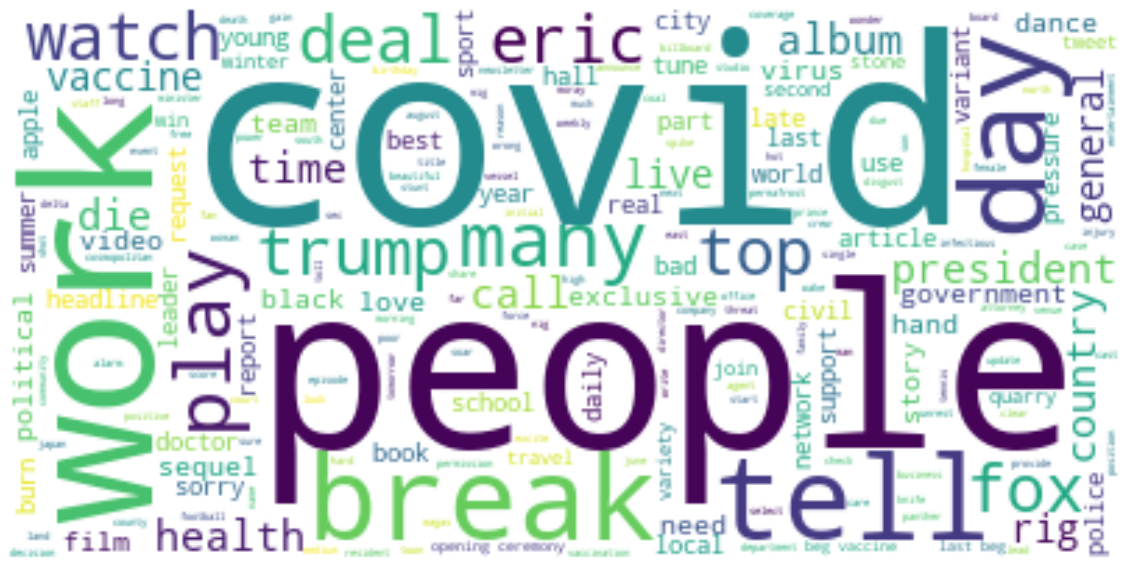

In [87]:
#Word cloud for topics
from wordcloud import WordCloud 
wordcloud_spam = WordCloud(background_color="white").generate(abc2)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Convert Text into Numerical Representation

###### Converting the clean preprocessed corpus to array

In [88]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
# Materialize the sparse data
data_dense = cv_arr.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.5966828478964401 %


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
# Creating vocabulary array which will represent all the corpus 
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

# get the vocb list
vocab_tf_idf

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['able',
 'absolutely',
 'accept',
 'access',
 'accidental',
 'across',
 'active',
 'activity',
 'actually',
 'adore',
 'advance',
 'advice',
 'advocate',
 'agent',
 'ago',
 'agree',
 'agreement',
 'alarm',
 'album',
 'alison',
 'alma',
 'along',
 'already',
 'also',
 'alway',
 'always',
 'ama',
 'amaze',
 'amid',
 'among',
 'ancient',
 'anniversary',
 'announce',
 'answer',
 'apology',
 'appear',
 'apple',
 'apply',
 'appoint',
 'approach',
 'archbishop',
 'archive',
 'argo',
 'around',
 'art',
 'article',
 'artist',
 'aside',
 'assistant',
 'atop',
 'attempt',
 'attend',
 'attorney',
 'auburn',
 'august',
 'author',
 'availability',
 'available',
 'aware',
 'awesome',
 'awkward',
 'back',
 'bad',
 'baku',
 'ban',
 'battle',
 'beat',
 'beautiful',
 'bed',
 'bee',
 'beg',
 'begin',
 'behind',
 'believe',
 'beneath',
 'best',
 'beyond',
 'big',
 'bill',
 'billboard',
 'bipartisanship',
 'birthday',
 'bishop',
 'bite',
 'black',
 'blame',
 'blasting',
 'blood',
 'bloody',
 'board',
 'boa

In [92]:
# Creating vocabulary array which will represent all the corpus 
vocab_cv = cv_vectorizer.get_feature_names()

# get the vocb list
vocab_cv

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['able',
 'absolutely',
 'accept',
 'access',
 'accidental',
 'across',
 'active',
 'activity',
 'actually',
 'adore',
 'advance',
 'advice',
 'advocate',
 'agent',
 'ago',
 'agree',
 'agreement',
 'alarm',
 'album',
 'alison',
 'alma',
 'along',
 'already',
 'also',
 'alway',
 'always',
 'ama',
 'amaze',
 'amid',
 'among',
 'ancient',
 'anniversary',
 'announce',
 'answer',
 'apology',
 'appear',
 'apple',
 'apply',
 'appoint',
 'approach',
 'archbishop',
 'archive',
 'argo',
 'around',
 'art',
 'article',
 'artist',
 'aside',
 'assistant',
 'atop',
 'attempt',
 'attend',
 'attorney',
 'auburn',
 'august',
 'author',
 'availability',
 'available',
 'aware',
 'awesome',
 'awkward',
 'back',
 'bad',
 'baku',
 'ban',
 'battle',
 'beat',
 'beautiful',
 'bed',
 'bee',
 'beg',
 'begin',
 'behind',
 'believe',
 'beneath',
 'best',
 'beyond',
 'big',
 'bill',
 'billboard',
 'bipartisanship',
 'birthday',
 'bishop',
 'bite',
 'black',
 'blame',
 'blasting',
 'blood',
 'bloody',
 'board',
 'boa

In [93]:
display(len(vocab_tf_idf))
display(len(vocab_cv))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


927

927

# Implementation of LDA

To implement LDA, pass the corpus: document-term matrix to the model. We had above obtained the unique words of vocabulary using both TF-IDF and Count Vectorizer. We can continue with either as have the same unique words in both the obtained vocabularies.

In [94]:
# Implementation of LDA:
from sklearn.decomposition import LatentDirichletAllocation
    
# Create object for the LDA class 
# Inside this class LDA: define the components:
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(cv_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
print(topic_words)

[[0.1        1.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        1.1        ... 1.09999072 0.1        0.1       ]
 ...
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        1.1       ]]


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Retrieve the Topics

In [96]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 10
for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    #np.argsort() is used to sort the index based on probablity
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['day' 'album' 'break' 'best' 'president' 'two' 'permafrost' 'poor'
 'finally']
Topic 2 ['play' 'watch' 'love' 'die' 'burn' 'request' 'get' 'police' 'leader']
Topic 3 ['deal' 'fox' 'ceremony' 'opening' 'film' 'there' 'time' 'second' 'stone']
Topic 4 ['need' 'come' 'dance' 'call' 'would' 'something' 'know' 'shot' 'select']
Topic 5 ['covid' 'people' 'video' 'health' 'want' 'try' 'magas' 'spike' 'actually']
Topic 6 ['live' 'exclusive' 'variety' 'black' 'civil' 'summer' 'minister' 'unrest'
 'south']
Topic 7 ['people' 'receive' 'million' 'say' 'many' 'already' 'daily' 'nearly'
 'provide']
Topic 8 ['vaccine' 'last' 'covid' 'tell' 'trump' 'hand' 'hold' 'beg' 'may']
Topic 9 ['work' 'sequel' 'back' 'two' 'book' 'lead' 'country' 'deal' 'join']
Topic 10 ['eric' 'covid' 'say' 'would' 'top' 'cancel' 'apple' 'think' 'general']


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 ##### Annotating the topics the documents

In [97]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(tf_idf_arr)  

# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document 1  -- Topic: 8
Document 2  -- Topic: 1
Document 3  -- Topic: 3
Document 4  -- Topic: 6
Document 5  -- Topic: 8
Document 6  -- Topic: 2
Document 7  -- Topic: 8
Document 8  -- Topic: 5
Document 9  -- Topic: 6
Document 10  -- Topic: 9
Document 11  -- Topic: 4
Document 12  -- Topic: 2
Document 13  -- Topic: 3
Document 14  -- Topic: 7
Document 15  -- Topic: 9
Document 16  -- Topic: 1
Document 17  -- Topic: 1
Document 18  -- Topic: 2
Document 19  -- Topic: 2
Document 20  -- Topic: 8
Document 21  -- Topic: 8
Document 22  -- Topic: 2
Document 23  -- Topic: 0
Document 24  -- Topic: 7
Document 25  -- Topic: 7
Document 26  -- Topic: 2
Document 27  -- Topic: 4
Document 28  -- Topic: 0
Document 29  -- Topic: 5
Document 30  -- Topic: 2
Document 31  -- Topic: 8
Document 32  -- Topic: 2
Document 33  -- Topic: 4
Document 34  -- Topic: 1
Document 35  -- Topic: 9
Document 36  -- Topic: 1
Document 37  -- Topic: 0
Document 38  -- Topic: 5
Document 39  -- Topic: 2
Document 40  -- Topic: 7
Document 

# This is the final output which gives us the topic along with the documents.

In [98]:
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(lda_model, cv_arr, cv_vectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [99]:
# saving the model 
import pickle 
pickle_out = open("topic_modelling.pkl", mode = "wb") 
pickle.dump(lda_model, pickle_out) 
pickle_out.close()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
